In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [33]:
f = open(os.path.expanduser("~/Desktop/current/movies-under-the-stars-22/movies1.csv"))
movies1 = pd.read_csv(f)
movies1

,Booking ID,Contact,Phone,Postal Codes,# of Pax,Pref?,Movie
0,#141804743,Alaina Boutte,(504) 875-9163,95835,2,0,1
1,#139267551,Alexander Poirier,(209) 483-8478,95814,2,0,1
2,#141169054,Alexander Yalong,(707) 419-1189,95835,2,0,1
3,#140349833,Alison Nealon,(916) 719-9484,95820,5,0,1
4,#141800580,Alyssa Stricklin,(916) 517-0693,95673,1,0,1
...,...,...,...,...,...,...,...
179,#138991359,Listzy Sandaval,(916) 868-8428,95822,2,1,4
180,#141569223,Liz Finch,(916) 699-1074,95814,1,1,4
181,#139149429,Priscilla Barron,(916) 396-8840,95819,2,1,4
182,#139596154,Taylor Brace,(916) 936-5446,95864,2,1,4


In [63]:
groupd = movies1.groupby(['Contact', 'Postal Codes'])['# of Pax'].sum().reset_index()
groupd

,Contact,Postal Codes,# of Pax
0,Alaina Boutte,95835,2
1,Alberto Vazquez,95822,1
2,Alexander Poirier,95814,2
3,Alexander Yalong,95835,4
4,Alison Nealon,95820,5
...,...,...,...
160,Willey Tracey,95661,2
161,Yvan Ngo,95758,2
162,chelsea fink,95811,2
163,liz finch,95814,4


In [66]:
ticketsSold = movies1.groupby(['Contact', 'Postal Codes'])['# of Pax'].sum()
ticketsSold

Contact            Postal Codes
Alaina Boutte      95835           2
Alberto Vazquez    95822           1
Alexander Poirier  95814           2
Alexander Yalong   95835           4
Alison Nealon      95820           5
                                  ..
Willey Tracey      95661           2
Yvan Ngo           95758           2
chelsea fink       95811           2
liz finch          95814           4
nancy palafox      95615           2
Name: # of Pax, Length: 165, dtype: int64

In [67]:
solo = 0
pair = 0
family = 0

for i in range(len(ticketsSold)):
    if ticketsSold[i] == 1:
        solo += ticketsSold[i]
    elif ticketsSold[i] == 2:
        pair += ticketsSold[i]
    else:
        family += ticketsSold[i]

stats = [solo, pair, family]
stats

[28, 188, 184]

In [80]:
ticketsSold.describe()

count    165.000000
mean       2.424242
std        1.283818
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: # of Pax, dtype: float64

In [82]:
zips = groupd.groupby('Postal Codes')['Postal Codes'].count()
zips.sort_values(ascending=False).head(20)

Postal Codes
95833    9
95814    8
95835    8
95822    8
95816    8
95819    6
95811    6
95828    5
95691    5
95826    5
95670    5
95823    5
95818    5
95834    4
95661    4
95829    4
95821    4
95827    3
95630    3
95608    3
Name: Postal Codes, dtype: int64

In [95]:
postals = {'zip': [95833,95814,95835,95822,95816,95819,95811,95828,95691,95826,95670,95823,
                   95818,95834,95661,95829,95821,95827,95630,95608,
                  95815], 
           'lat': [38.6138,38.5778,38.6728,38.5129,38.58,38.5679,38.592,38.493,38.5816,38.55,
                  38.5961,38.4604,38.5603,38.6418,38.7424,38.4876,38.6259,38.5544,38.061,38.6273,
                  38.5802], 
           'lon': [121.5085,121.4942,121.5484,121.497,121.4628,121.4399,121.4942,121.3885,121.5313,121.3885,
                  121.297,121.4342,121.497,121.5256,121.2512,121.3427,121.3885,121.3256,121.1023,121.3198,
                  121.5069], 
           'count': [9, 8, 8, 8, 8, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3,
                     1]}

In [96]:
postalsDF = pd.DataFrame.from_dict(postals)
postalsDF

,zip,lat,lon,count
0,95833,38.6138,121.5085,9
1,95814,38.5778,121.4942,8
2,95835,38.6728,121.5484,8
3,95822,38.5129,121.4970,8
4,95816,38.5800,121.4628,8
5,95819,38.5679,121.4399,6
6,95811,38.5920,121.4942,6
7,95828,38.4930,121.3885,5
8,95691,38.5816,121.5313,5
9,95826,38.5500,121.3885,5


<AxesSubplot:xlabel='lat', ylabel='lon'>

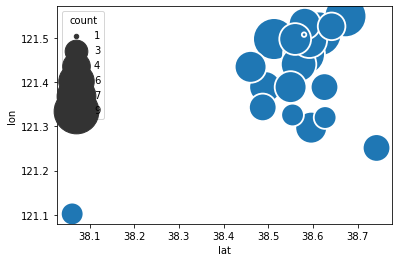

In [97]:
import seaborn as sns

sns.scatterplot(data=postalsDF, x='lat', y='lon', size = 'count', sizes=(20,2000))